In [1]:
import pandas as pd

file_path = 'C:\\Users\\qjack\\Desktop\\train.csv'
bitcoin_df = pd.read_csv(file_path)
bitcoin_df.rename(columns = {'Timestamp' : 'day', 'market-price' : 'price'}, inplace=True)

test_file_path = 'C:\\Users\\qjack\\Desktop\\test.csv'
bitcoin_test_df = pd.read_csv(test_file_path)
bitcoin_test_df.rename(columns = {'Timestamp' : 'day', 'market-price':'price'}, inplace=True)

In [2]:
bitcoin_test_df.shape

(7, 2)

In [3]:
bitcoin_df.head(10)

,day,price
0,2018-01-29 0:00,11742.33
1,2018-01-30 0:00,11186.12
2,2018-01-31 0:00,10082.52
3,2018-02-01 0:00,10204.00
4,2018-02-02 0:00,9098.27
5,2018-02-03 0:00,8852.73
6,2018-02-04 0:00,9224.62
7,2018-02-05 0:00,8202.06
8,2018-02-06 0:00,6925.46
9,2018-02-07 0:00,7712.37


In [4]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     1088 non-null   object 
 1   price   1088 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [5]:
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day',inplace=True)
bitcoin_df.head()

,price
day,
2018-01-29,11742.33
2018-01-30,11186.12
2018-01-31,10082.52
2018-02-01,10204.00
2018-02-02,9098.27


In [6]:
bitcoin_df.describe()

,price
count,1088.000000
mean,9042.404099
std,5096.153842
min,3231.910000
25%,6504.125000
50%,8266.535000
75%,10147.247500
max,40670.250000


In [7]:
bitcoin_df.isnull().sum()

price    7
dtype: int64

In [8]:
bitcoin_df.shape

(1095, 1)

In [9]:
bitcoin_df.dropna(inplace=True)

In [10]:
print(bitcoin_df.isnull().sum())
bitcoin_df.shape

price    0
dtype: int64


(1088, 1)

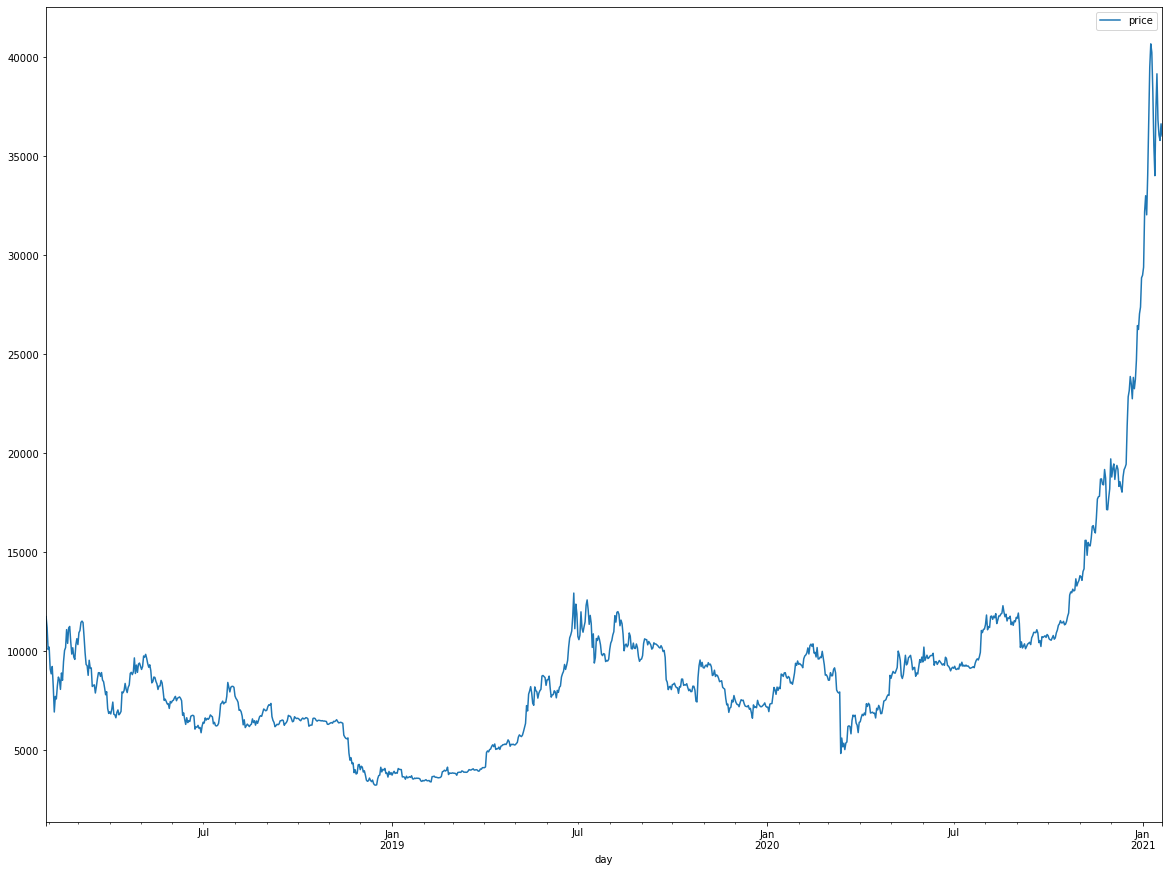

In [22]:
import matplotlib.pyplot as plt

bitcoin_df.plot()
plt.rcParams["figure.figsize"] = (20,15) #plt 그래프 사이즈 조정
plt.show()


In [23]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

import warnings
warnings.filterwarnings(action='ignore')

In [24]:
model = ARIMA(bitcoin_df.price.values, order=(0,2,1))
model_fit = model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                 1086
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -8128.427
Method:                       css-mle   S.D. of innovations            430.184
Date:                Thu, 28 Jan 2021   AIC                          16260.853
Time:                        14:54:10   BIC                          16270.834
Sample:                             2   HQIC                         16264.631
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D2.y    -0.9840      0.006   -162.153      0.000      -0.996      -0.972
                                    Roots                                    
                  Real          Imaginary           M

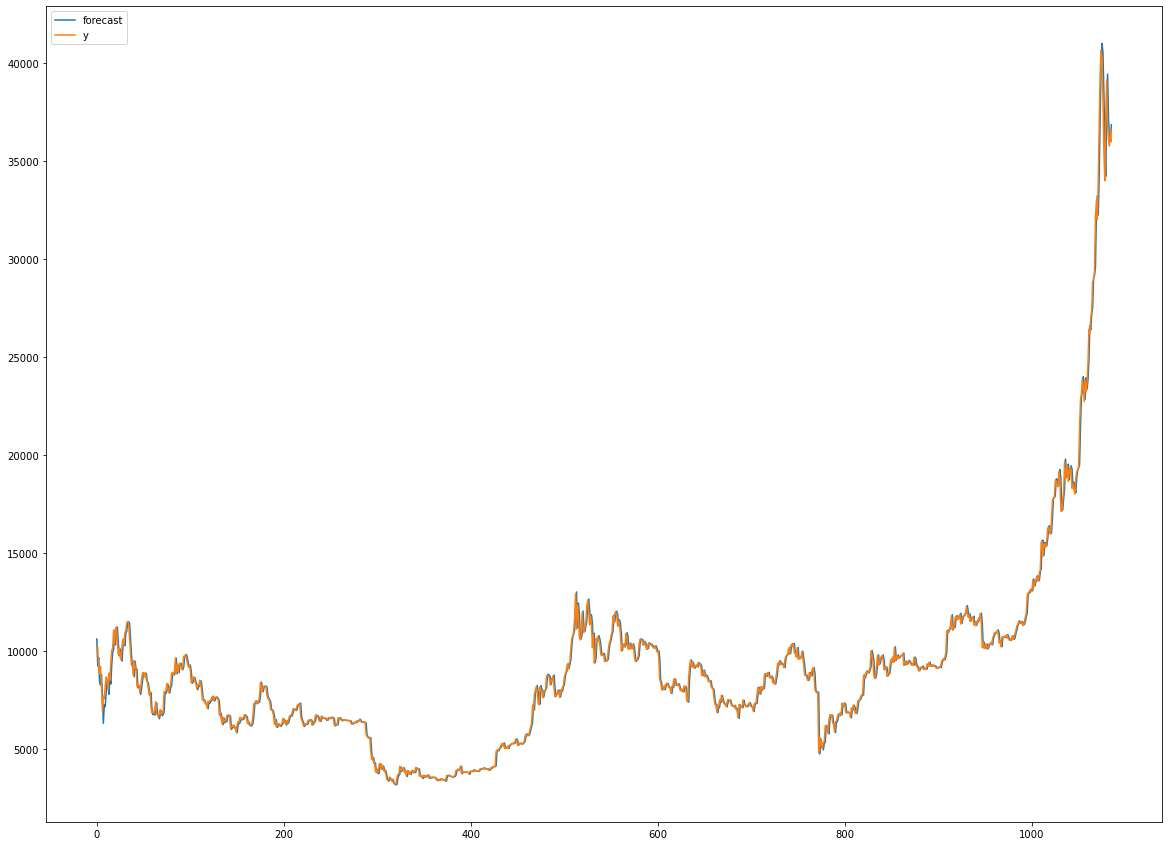

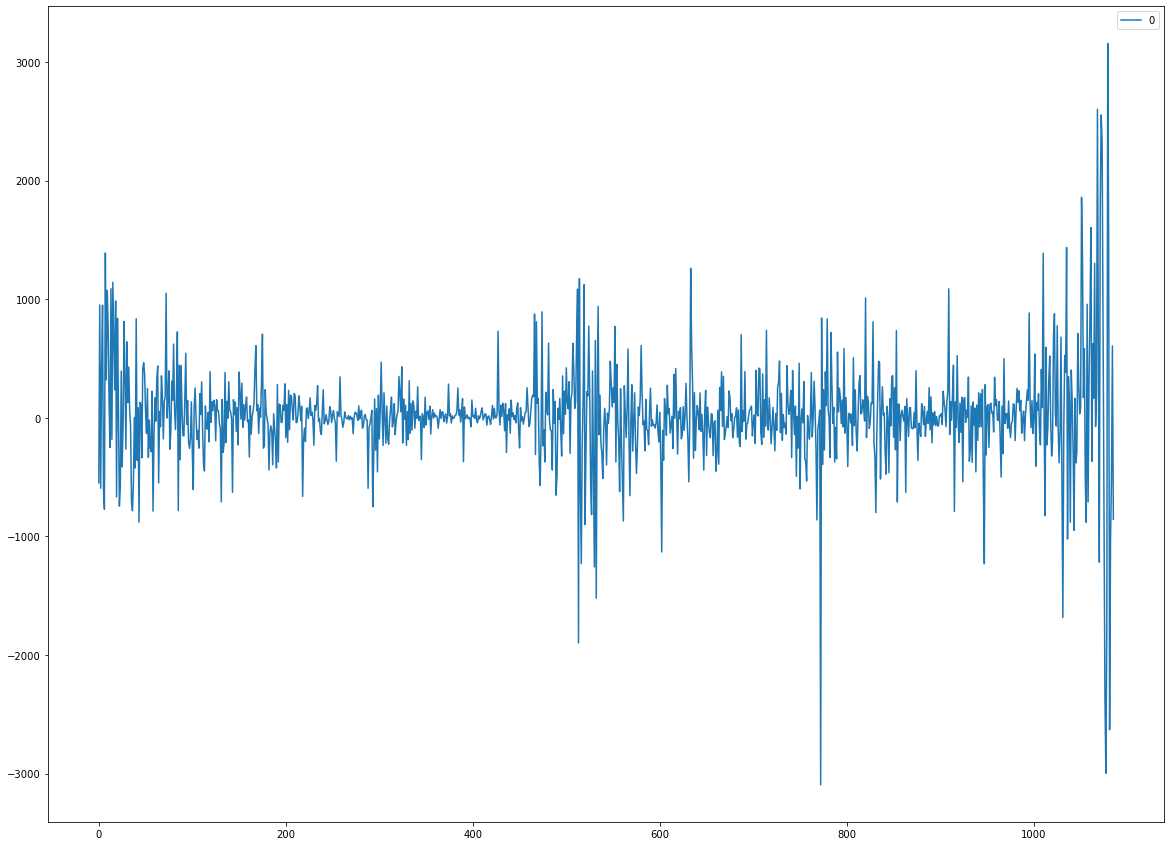

In [26]:
fig = model_fit.plot_predict()

residuals = pd.DataFrame(model_fit.resid)
plt.rcParams["figure.figsize"] = (20,15)
residuals.plot()

In [28]:
pred_model = model_fit.forecast(steps=7)
pred = pred_model[0].tolist()
pred

[36249.11701058457,
 36478.104021169136,
 36707.091031753705,
 36936.078042338275,
 37165.065052922844,
 37394.05206350741,
 37623.03907409198]

In [29]:
test = bitcoin_test_df.price.values
test

array([35538.98, 30797.88, 33002.38, 32099.74, 32276.84, 32243.26,
       32541.8 ])

In [35]:
pred_lower = []
pred_upper = []
for lower_upper in pred_model[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_lower.append(lower)
    pred_upper.append(upper)
    
pred_upper

[37092.261792635436,
 37680.07798847145,
 38190.97432779994,
 38663.14565268356,
 39111.25745191508,
 39542.76827520816,
 39962.072378015124]

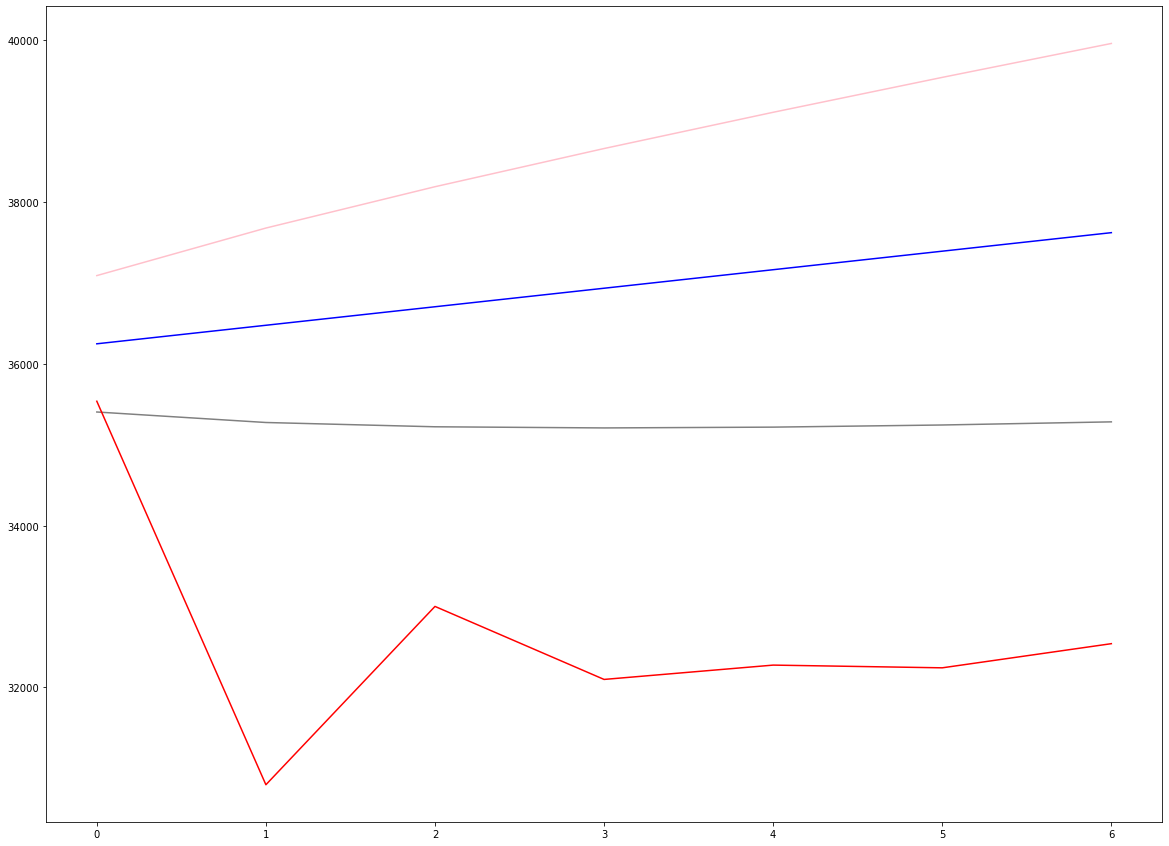

In [31]:
plt.plot(pred,color="blue") #예측값
plt.plot(pred_lower,color="gray")#예측 최저값
plt.plot(pred_upper,color="pink")#예측 최고값
plt.plot(test,color="red")#실제 값